In [3]:
import numpy as np 
import matplotlib.pyplot as plt
from Lorenz_63 import Lorenz_63 as model
import scipy.stats as st
from tqdm import tqdm as tqdm

In [4]:
nx = 3
nt = 1000
dk = 8
dt = 0.01
a, r, b = 10., 28., 8./3.
p = [a, r, b]
x0 = np.ones(nx)

In [5]:
for i in range(nt):
    x0 = model.forward_model(x0, p, dt)

In [6]:
X = np.zeros((nx, nt))
X[:, 0] = x0

In [7]:
x_dummy = np.copy(x0)
for i in tqdm(range(1, nt)):
    for j in range(dk):
        x_dummy = model.forward_model(x_dummy, p, dt) 
    X[:, i] = x_dummy
        

100%|██████████| 999/999 [00:00<00:00, 5975.88it/s]


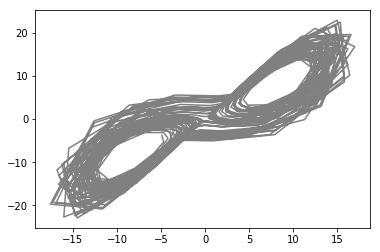

In [8]:
plt.plot(X[0, :], X[1, :], '0.5')

In [9]:
nt = 50
perturbation_sigma_sq = 1.
Q = perturbation_sigma_sq * np.eye(nx)
ne = 1000
Xe = np.zeros((nx, ne, nt))

In [10]:
offset = 200
Xe[:, :, 0] = np.stack([X[:, offset]]*ne).T
Xe[:, :, 0] += st.multivariate_normal(np.zeros(nx), Q).rvs(ne).T

In [11]:
Xe_dummy = Xe[:, :, 0]
for i in tqdm(range(1, nt)):
    for j in range(dk):
        for k in range(ne):
            Xe_dummy[:, k] = model.forward_model(Xe_dummy[:, k], p, dt) 
    Xe[:, :, i] = Xe_dummy

100%|██████████| 49/49 [00:07<00:00,  6.26it/s]


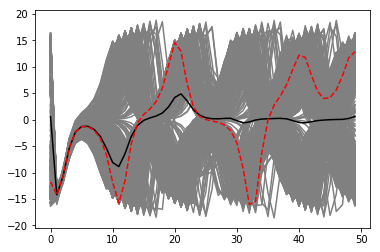

In [12]:
for k in range(ne):
    plt.plot(Xe[0, k, :], '0.5')    
plt.plot(np.mean(Xe[0, :, :], axis=0), 'k')
plt.plot(X[0, offset:offset+nt], 'r--')